In this practice, we will approximate some non-linear function with two-layer perceptrons.  

In the previous lecture, we learned that multi-layer perceptrons can approximate any non-linear function according to the universal approximation theorem. Thus, we will investigate this lesson. 

Firstly, let's import necessary python packages: numpy, tensorflow and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Then, generate samples from a non-linear function: In this pratcie, we choose a function \\(f(x) = 2x^2 + \epsilon \\) for an example.

In [2]:
n_samples = 500
x_data = np.random.randn(n_samples, 1).flatten()
#x_data = np.arange(-3., 3., 0.02).flatten()
#n_samples = x_data.shape[0]
eps = np.random.normal(0.0, 1.0, n_samples)
y_data = 2.*x_data**2 + eps
#y_data = x_data**3 - x_data**2 - x_data + 3.0 + eps
#y_data = 3.*np.sin(2.*x_data) + eps

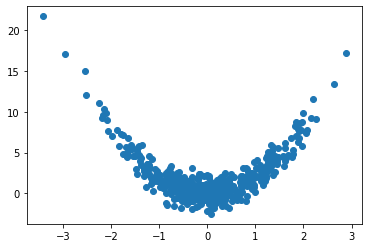

In [3]:
plt.scatter(x_data, y_data)

The remaining procedure is same as the previous practice. 

However, we construct our hypothesis with a non-linear function: multi-layer percetpron whose hidden layer is activated with a sigmoid function, in contrast to the previous hypothesis was a linear-function.

In [4]:
x = tf.placeholder(tf.float64, [None,])
y = tf.placeholder(tf.float64, [None,])

In [5]:
hidden_dim = 16
x_ = tf.expand_dims(x, axis=-1)
# must include non-linear activation
y_pred = tf.keras.layers.Dense(units=hidden_dim, use_bias=True, activation=tf.nn.sigmoid)(x_) 
y_pred = tf.keras.layers.Dense(units=1, use_bias=True, activation=None)(y_pred)
y_pred = tf.reshape(y_pred, [-1])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
loss = tf.reduce_mean((y-y_pred)**2)

In [7]:
sess = tf.Session()
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

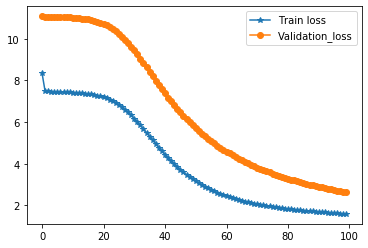

In [8]:
batch_size = 10
num_epoches = 100
num_train = int(n_samples*0.8)
x_train = x_data[:num_train]
x_validation = x_data[num_train:]
y_train = y_data[:num_train]
y_validation = y_data[num_train:]
num_train_batches = x_train.shape[0] // batch_size
num_validation_batches = x_validation.shape[0] // batch_size

train_loss_list = []
validation_loss_list = []
for epoch in range(num_epoches):
    # Train
    train_loss = 0.0
    for i in range(num_train_batches):
        x_batch = x_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
        _, train_loss_batch = sess.run([opt, loss], feed_dict={x:x_batch, y:y_batch})
        train_loss += train_loss_batch
    train_loss /= num_train_batches
    train_loss_list.append(train_loss)
    
    # Validation
    validation_loss = 0.0
    for i in range(num_validation_batches):
        x_batch = x_validation[i*batch_size:(i+1)*batch_size]
        y_batch = y_validation[i*batch_size:(i+1)*batch_size]
        validation_loss_batch = sess.run(loss, feed_dict={x:x_batch, y:y_batch})
        validation_loss += validation_loss_batch
    validation_loss /= num_validation_batches
    validation_loss_list.append(validation_loss)

# Plot train and validation losses w.r.t training epoches
x__ = np.arange(0,num_epoches)
plt.plot(x__, train_loss_list, '*-', label='Train loss')
plt.plot(x__, validation_loss_list, 'o-', label='Validation_loss')
plt.legend()

(50,)
(50,)
(50,)


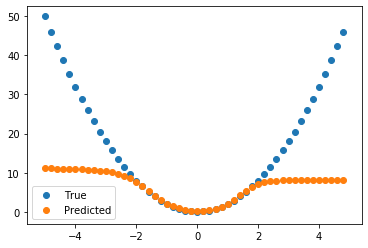

In [9]:
#x_test = np.random.randn(100, 1).flatten()
x_test = np.arange(-5., 5., 0.2)
y_true = 2.*x_test**2
#y_true = x_test**3 - x_test**2 + x_test - 2.0
#y_true = 3.*np.sin(2.*x_test)
num_test_batches = x_test.shape[0] // batch_size
y_test = []
for i in range(num_test_batches):
    x_batch = x_test[i*batch_size:(i+1)*batch_size]   
    y_test_batch = sess.run(y_pred, feed_dict={x:x_batch})
    y_test.append(y_test_batch)
y_test = np.asarray(y_test).flatten()
print (x_test.shape)
print (y_test.shape)
print (y_true.shape)
# Plot
plt.figure()
plt.scatter(x_test, y_true, label='True')
plt.scatter(x_test, y_test, label='Predicted')
plt.legend()

We can see 
- Our hypothesis with the MLP can fit training examples quite correctly for whose x-values at (-2, 2), where most training samples are located. 
- However, for outlier samples, our hypothesis is not able to infer correct values. 
- Thus, to utilize our hypothesis more robust and safely, it is necessary to detect incorrect predictions even though we don't have true labels for them, such as by estimating predictive uncertainty. We will investigate more details of Bayesian deep learning in future.